# K-Nearest Neighbor Example
The example implements a basic K-Nearest Neighbors (KNN) algorithm in Python using a small dataset. It loads a dataset of 20 instances with two attributes each, then visualizes them, standardizes the attributes, and computes distances to a given test point.

### Importing Necessary Libraries

- matplotlib.pyplot: Used for plotting the data points and visualizing the dataset.

- numpy: Used for handling numerical data, particularly for operations like standardization and distance calculation

In [107]:
# Module imports
import matplotlib.pyplot as plt
import numpy as np


A dataset of 20 instances is defined, with each instance having two numerical features (e.g., x and y coordinates) and a label (either +, -).

The format is [feature1, feature2, label].
The labels + and - represent two different classes.

In [108]:
# 20 instances dataset
data = [[0.8, 6.3, '-'],
[1.4, 8.1, '-'],
[2.1, 7.4, '-'],
[2.6, 14.3, '+'],
[6.8, 12.6, '-'],
[8.8, 9.8, '+'],
[9.2, 11.6, '-'],
[10.8, 9.6, '+'],
[11.8, 9.9, '+'],
[12.4, 6.5, '+'],
[12.8, 1.1, '-'],
[14.0, 19.9, '-'],
[14.2, 18.5, '-'],
[15.6, 17.4, '-'],
[15.8, 12.2, '-'],
[16.6, 6.7, '+'],
[17.4, 4.5, '+'],
[18.2, 6.9, '+'],
[19.0, 3.4, '-'],
[19.6, 11.1, '+'],
]

Separation of Data: The dataset is divided into positive and negative lists based on their labels (+ and -).

The x and y coordinates of each instance are separated into their respective lists for easy plotting.

Scatter Plot: The positive and negative instances are plotted on a 2D scatter plot using `plt.scatter()`.

Test Point: The test point [9.1, 11.0] (label *) is also plotted on the graph to visualize its position relative to the other data points.

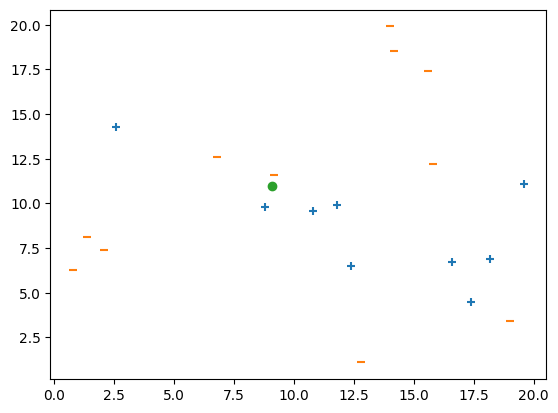

In [109]:
# Understand the dataset by plotting data points
positive = [[], []]
negative = [[], []]
for i,v in enumerate(data):
    if v[2] == '+':
        positive[0].append(v[0])
        positive[1].append(v[1])
    else:
        negative[0].append(v[0])
        negative[1].append(v[1])

plt.scatter(positive[0], positive[1], marker='+')
plt.scatter(negative[0], negative[1], marker='_')

# Showing a test instance
plt.scatter([9.1],[11.0])

plt.show()
        

Extracting Attribute 1: The first feature (attribute) of all instances is extracted (data_np[:, 0]), which corresponds to the x values of the data points.

Standardization: The feature values are standardized by subtracting the mean and dividing by the standard deviation. This is a common technique to scale the features so that they have a mean of 0 and a standard deviation of 1, making them comparable in scale.

The result is stored in attribute1_standardized

In [110]:
# Standardizing the first feature\attribute
data_np = np.array(data,)

def standardize(d):
    attribute1_values = np.array(d , dtype = np.float32)
    attribute1_standardized = ((attribute1_values - attribute1_values.mean()) / (attribute1_values.std()))
    return attribute1_standardized, attribute1_values.mean(), attribute1_values.std()

attribute1_standardized = standardize(data_np[:,0])[0]
attribute2_standardized = standardize(data_np[:,1])[0]


Plotting the Standardized Data

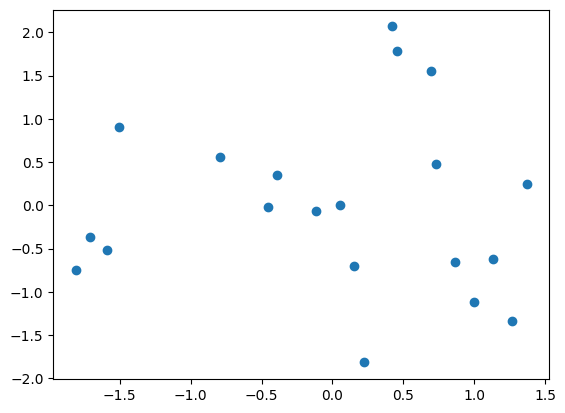

In [111]:
plt.scatter(attribute1_standardized , attribute2_standardized)
# plt.scatter(negative[0], negative[1])
# plt.scatter([9.1],[11.0])
plt.show()

Distance Function: A function distance(p1, p2) is defined to calculate the Euclidean distance between two points p1 and p2. This is the core of KNN, as the algorithm classifies points based on their proximity to others.

Unclassified Test Point: The test point (standardized) [-0.39403465, 0.22349264] is provided, which corresponds to the normalized coordinates of the test point [9.1, 11.0].

Calculating Distances: The script iterates over each data point, calculates the Euclidean distance from the test point to that data point, and stores the distance along with the label in the distances dictionary.

In [112]:
def distance(p1, p2):
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2) ** 0.5

In [113]:
original_unclassified_instance = [9.1,11.0]

# Standardize it
unclassified = [ (original_unclassified_instance[0] - standardize(data_np[:,0])[1] / standardize(data_np[:,0])[2])  , (original_unclassified_instance[1] - standardize(data_np[:,1])[1] / standardize(data_np[:,1])[2]) ]
distances = {}
for i,v in enumerate( data):
    distances[i] =( distance(unclassified, [v[0], v[1]]) , v[2])

print(distances)

{0: (np.float32(6.8876367), '-'), 1: (np.float32(5.8179893), '-'), 2: (np.float32(5.2888966), '-'), 3: (np.float32(7.020802), '+'), 4: (np.float32(3.6602366), '-'), 5: (np.float32(1.8488563), '+'), 6: (np.float32(3.3420863), '-'), 7: (np.float32(3.701749), '+'), 8: (np.float32(4.740222), '+'), 9: (np.float32(5.792382), '+'), 10: (np.float32(9.674885), '-'), 11: (np.float32(12.907761), '-'), 12: (np.float32(11.8620405), '-'), 13: (np.float32(11.941972), '-'), 14: (np.float32(9.23371), '-'), 15: (np.float32(9.711378), '+'), 16: (np.float32(11.172927), '+'), 17: (np.float32(11.235373), '+'), 18: (np.float32(13.084156), '-'), 19: (np.float32(12.628632), '+')}


Sorting Distances: The distances dictionary is sorted by the distance values (ascending). This helps identify the nearest neighbors.

The sorted dictionary distances_sorted contains the distances to the test point and their corresponding labels.

In [114]:
distances_sorted = dict(sorted(distances.items(), key=lambda item: item[1]))
print(distances_sorted)

{5: (np.float32(1.8488563), '+'), 6: (np.float32(3.3420863), '-'), 4: (np.float32(3.6602366), '-'), 7: (np.float32(3.701749), '+'), 8: (np.float32(4.740222), '+'), 2: (np.float32(5.2888966), '-'), 9: (np.float32(5.792382), '+'), 1: (np.float32(5.8179893), '-'), 0: (np.float32(6.8876367), '-'), 3: (np.float32(7.020802), '+'), 14: (np.float32(9.23371), '-'), 10: (np.float32(9.674885), '-'), 15: (np.float32(9.711378), '+'), 16: (np.float32(11.172927), '+'), 17: (np.float32(11.235373), '+'), 12: (np.float32(11.8620405), '-'), 13: (np.float32(11.941972), '-'), 19: (np.float32(12.628632), '+'), 11: (np.float32(12.907761), '-'), 18: (np.float32(13.084156), '-')}


The code counts how many of the 5 nearest neighbors are labeled as positive (+) and negative (-) by filtering the sorted distance list and counting the occurrences of each label, then prints the counts.

In [115]:
positive_count = len(list( filter(lambda x:x[1][1] == '+', list(distances_sorted.items())[:5] )))
negative_count = len(list( filter(lambda x:x[1][1] == '-', list(distances_sorted.items())[:5] )))
print('Voting results: positive( ',positive_count,') negative(' , negative_count,')')

Voting results: positive(  3 ) negative( 2 )
